# EDA

The purpose of this section is to get started on the EDA unit of DSC on my dev df. I still need to crunch the whole df, but by the time I do that I'll have "finished" EDA, or at least I'll know what plots I will want.

Some questions I'll be exploring in this notebook include:
(rewrite this at end)
#### think in terms of storytelling!
1. still need to plot stations, where are they? to give a sense of the lay of the land

2. what else can you do with time series data? how about the heatmap of number of rides started and ended by hour, by day, by year (once you have the data concatenated)

3. What is the most poriftable bike, station?

4. map plots continued - size the bubbles by number of rides started at and ended at that station

5. use categoricals: do more men or women start from a particular station? do more men or women end up at a certain station?

6. what is the average duraiton of ride by hour? (group by aggregating with np.mean on duration)

7. do subscribers go further than customers? (hypothesis: yes because they have more time "before" they pay

8. what are the age groups after you bucket them, not just the distribution?
9. do age groups have particular behavior? particular: duration of ride, departure locations, arrival locations, number of rides, subscribers vs. customers, etc.

10. correlations: between age group and gender, gender and user type, user type and age group, 

In [1]:
import pandas as pd, numpy as np
dev_df = pd.read_csv('dev_df.csv')

In [2]:
# First define commonly use columns as variables:

mins = dev_df['duration_min']

costs = dev_df['cost_to_ride']

genders = dev_df['member_gender']

ages = dev_df['age']

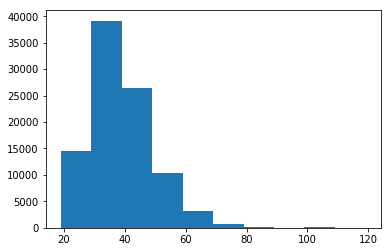

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(dev_df['age']);

Based on the histogram above, I've decided to remove values >= 100

In [4]:
# simplify the name of the df
dev_df = dev_df[dev_df['age'] < 100]

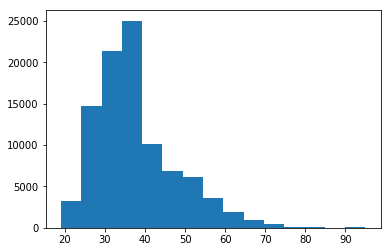

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

age = dev_df['age']

plt.hist(x=age, bins = 15);

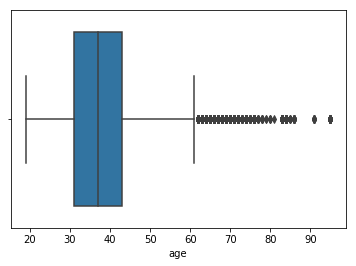

In [6]:
import seaborn as sns

sns.boxplot(age);

In [7]:
dev_df = dev_df[dev_df['age'] < 90]

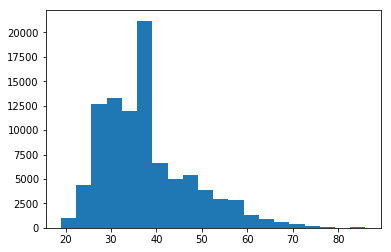

In [8]:
age = dev_df['age']

plt.hist(x=age, bins = 20);
plt.show()

Honestly I could cut this down to a max age of 75, it doesn't really matter - bikesharing is such a milennial thing.

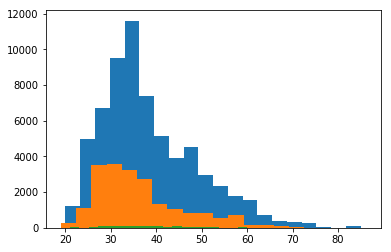

In [9]:
# take a look at the distribution by gender below

men = dev_df[dev_df['member_gender'] == 0.0]['age']
women = dev_df[dev_df['member_gender'] == 1.0]['age']
other = dev_df[dev_df['member_gender'] == 2.0]['age']

plt.hist(x=men, bins = 20)
plt.hist(x=women, bins = 20)
plt.hist(x=other, bins = 20)
plt.show();

In [10]:
mins = dev_df['duration_min']
mins.describe()

count    94649.000000
mean        14.519498
std         42.544654
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max       1426.000000
Name: duration_min, dtype: float64

In [11]:
dev_df['start_time'] = pd.to_datetime(dev_df['start_time'])
dev_df['end_time'] = pd.to_datetime(dev_df['end_time'])

dev_df['start_time'][0].hour

# slightly offset, since most rides are under 30 min and most 

#plt.hist(start_hours, bins=22)
#plt.hist(end_hours, bins=22, alpha=0.5)

22

In [12]:
start_hours = dev_df['start_time'].apply(lambda x: x.hour)

end_hours = dev_df['end_time'].apply(lambda x: x.hour)

days = dev_df['end_time'].apply(lambda x: x.day)

In [13]:
days_list = days.value_counts(ascending=True).index.tolist()

counts = days.value_counts(ascending=True).tolist()

d= {'days':days_list,
    'counts':counts}

day_counts = pd.DataFrame(d)

day_counts = day_counts.sort_values(['days'])

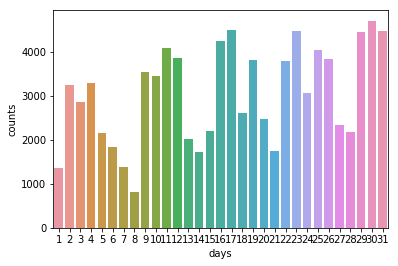

In [14]:
#interesting cyclic pattern, looks like peaks in beginning of weeks, with higher peaks progressively through month to the end of the month being the max

sns.barplot(x=day_counts.days, y=day_counts.counts);

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


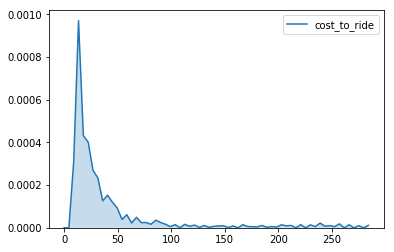

In [15]:
# this is an unnecessarily unreadable plot, just use a hist with proper bin size

sns.kdeplot(dev_df['cost_to_ride'], shade=True, gridsize=40)

In [16]:
# considering dropping this, or if I know the date it launched I can see if it increased revenue for Lyft or not
dev_df['bike_share_for_all_trip'].value_counts()

No     88548
Yes     6101
Name: bike_share_for_all_trip, dtype: int64

In [17]:
bikes = dev_df['bike_id']

start_stations = dev_df['start_station_id']
end_stations = dev_df['end_station_id']

# make a list of typles, where the first element is the start station and second element is end station for each trip
# then see what the most common trip is
# there may be a better way of doing this: get maps working and plot starts and ends, size = num trips
start_ends = tuple([start_stations, end_stations])

Create a new dataframe that contains start and end station ids, and the number of trips for each.

Also, look into the most profitable bike by pivoting on bike_id and summing cost of rides

In [18]:
# melt it down
bike_revenue = dev_df.pivot_table(values='cost_to_ride', columns='bike_id', aggfunc='sum').melt()

In [19]:
# best performer to least performer
bike_revenue = bike_revenue.sort_values('value', ascending=False)
bike_revenue

,bike_id,value
280,364,410
2195,2765,355
223,292,342
814,1107,327
2254,2841,324
1720,2201,320
2234,2815,314
571,713,303
2971,3642,296
2982,3653,287


In [20]:
bike_revenue = bike_revenue[bike_revenue['value'] < 300]

(array([952., 526., 322., 240., 168., 126., 100.,  86.,  62.,  56.,  51.,
         42.,  30.,  31.,  32.,  28.,  18.,  12.,  12.,  20.,  11.,   6.,
         10.,   6.,   8.,   3.,   4.,   8.,   2.,   4.,   3.,   3.,   2.,
          4.,   5.,   2.,   4.,   1.,   4.,   8.,   4.,   4.,   4.,   8.,
          9.,   6.,   3.,   3.,   3.,   1.]),
 array([  0.  ,   5.92,  11.84,  17.76,  23.68,  29.6 ,  35.52,  41.44,
         47.36,  53.28,  59.2 ,  65.12,  71.04,  76.96,  82.88,  88.8 ,
         94.72, 100.64, 106.56, 112.48, 118.4 , 124.32, 130.24, 136.16,
        142.08, 148.  , 153.92, 159.84, 165.76, 171.68, 177.6 , 183.52,
        189.44, 195.36, 201.28, 207.2 , 213.12, 219.04, 224.96, 230.88,
        236.8 , 242.72, 248.64, 254.56, 260.48, 266.4 , 272.32, 278.24,
        284.16, 290.08, 296.  ]),
 <a list of 50 Patch objects>)

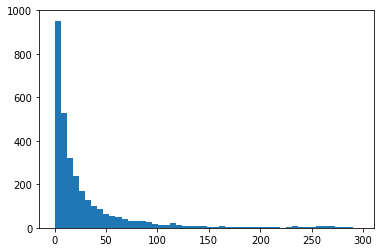

In [21]:
# distribution of value by bike
plt.hist(bike_revenue.value, bins=50)

In [22]:
#bike 3642 has accrued the most value

bike_revenue[bike_revenue['value'] > 250].sort_values('value', ascending=False)

,bike_id,value
2971,3642,296
2987,3658,287
2982,3653,287
553,690,286
2052,2593,281
1165,1518,279
3063,3743,279
2500,3136,278
87,125,274
2928,3597,273


(array([2960., 4513., 5197., 2172., 2088., 5360., 5755., 5445., 2274.,
        6243., 5992., 5080., 3642., 4423., 7319., 5672., 4712., 4537.,
        6824., 4441.]),
 array([736695.00701668, 736696.59789259, 736698.18876851, 736699.77964443,
        736701.37052034, 736702.96139626, 736704.55227217, 736706.14314809,
        736707.73402401, 736709.32489992, 736710.91577584, 736712.50665176,
        736714.09752767, 736715.68840359, 736717.2792795 , 736718.87015542,
        736720.46103134, 736722.05190725, 736723.64278317, 736725.23365908,
        736726.824535  ]),
 <a list of 20 Patch objects>)

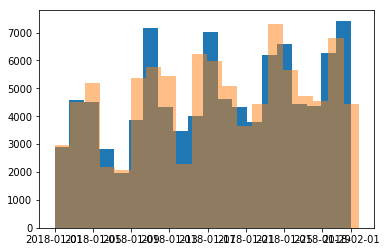

In [23]:
# start and end hist
plt.hist(dev_df['start_time'], bins=20)
plt.hist(dev_df['end_time'], bins=20, alpha=0.5)

### More data viz and mapping

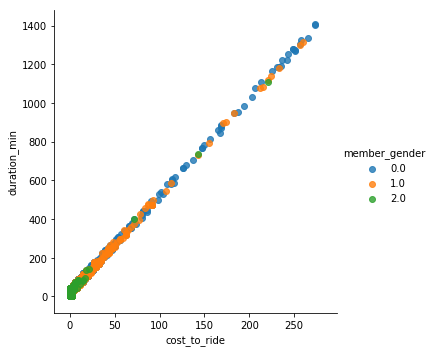

In [24]:
# plotting cost and duration colored by gender
sns.lmplot(x='cost_to_ride', y='duration_min', hue='member_gender', data=dev_df, fit_reg=False)

Naturally duration of ride and cost are very correlated, but interestingly we see a bunching of lower cost and shorter rides for gender Female and Other (1 and 2 respectively).

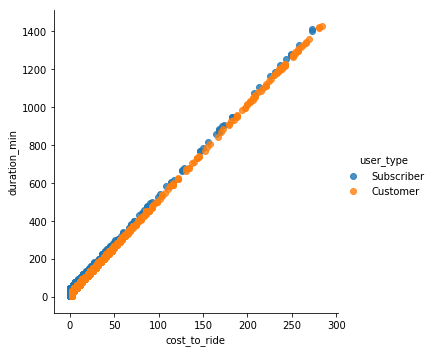

In [25]:
# cost and duration colored by user type
sns.lmplot(x='cost_to_ride', y='duration_min', hue='user_type', data=dev_df, fit_reg=False)

It doesn't seem like there are any differecnces really between subscribers and customers, though in terms of cost it makes sense that customer user types are more spread out across this spectrum since they accrue higher costs. It doesn't seem like accruing higher costs for riding longer is deterring them from partaking though which is interesting.